# neuralthreads
[medium](https://neuralthreads.medium.com/i-was-not-satisfied-by-any-deep-learning-tutorials-online-37c5e9f4bea1)

## Chapter 2 — Optimizers

Adam — Update to RMSprop, storing gradient and square of gradients

### 2.7 How does Adam works?

> First post (own_tutorial_1.ipynb).

> Second post (own_tutorial_2.ipynb).

> Third post (own_tutorial_3.ipynb).

> Fourth post (own_tutorial_4.ipynb).

> Fifth post (own_tutorial_5.ipynb).

> Sixth post (own_tutorial_6.ipynb).

> Seventh post (own_tutorial_7.ipynb).

> Eighth post (own_tutorial_7.ipynb).

> Previous post (own_tutorial_8.ipynb).

Adam stands for ***Adaptive Moment Estimation***. It is an update to **RMSprop** in which we store gradients and square of gradients in a restricted manner and we call them first moment and second moment respectively.

> Note — In the original paper, the bias correction is included in first and second moment but we will include it in the learning rate and we will call it ‘learning rate hat’

We calculate ‘learning rate hat’ as follow:


In [1]:
%%latex
\begin{gather*}
    \widehat{learning\_rate} = learning\_rate * \frac{\sqrt{1 - \beta_{2}^{i+1}}}{1 - \beta_{1}^{i+1}}\\
    \\
    \text{Where beta 1 and beta 2 are decay rates for the first and second moment respectively, and 'i' is the iteration loop index starting from 0.}\\
    \text{And, we calculate update as follow:}\\
    \\
    update = - \widehat{learning\_rate} * \frac{moment1}{\sqrt{moment2 + epsilon}}


\end{gather*}

<IPython.core.display.Latex object>

This post is divided into 3 sections.

1. Adam in 1 variable
2. Adam animation for 1 variable
3. Adam in multi-variable function

## #1 Adam in 1 variable

In this method, we store gradients and squares of gradients in a restricted manner and add a bias correction with decay rates in the learning rate calling it learning rate hat.

Adam algorithm in simple language is as follows:

> Step 1 - Set starting point and learning rate

> Step 2 - initiate

>               beta1 = 0.9
>               beta2 = 0.999
>               moment1 = 0
>               moment2 = 0
>               epsilon = 10**-8

> Step 3 - Initiate loop  
> >         Step 3.1 - calculate learning rate hat as stated above  
> >         Step 3.2 - calculate moment1 = beta1 * moment1 + (1 - beta1) * gradient  
> >         Step 3.3 - calculate moment2 = beta2 * moment2 + (1 - beta2) * gradient**2  
> >         Step 3.4 - calculate update as stated above  
> >         Step 3.5 - add update to point  

First, let us define the function and its derivative and we start from x = -1

In [2]:
%%latex
\begin{gather*}
    y = f(x) = x - x^{3} \\
    \frac{dy}{dx} = f'(x) = 1 - 3x^{2} \\  
\end{gather*}

<IPython.core.display.Latex object>

In [3]:
import numpy as np
np.random.seed(42)

def f(x):                           # function definition                        
    return x - x**3

def fdash(x):                       # function derivative definition
    return 1 - 3*(x**2)

And now Adam

In [4]:
point = -1                                # step 1
learning_rate = 0.01

beta1 = 0.9                               # step 2
beta2 = 0.999
epsilon = 10**-8
moment1 = 0
moment2 = 0

for i in range(1000):                     # step 3
    learning_rate_hat = learning_rate * np.sqrt(1 - beta2**(i + 1)) / (1 - beta1**(i + 1))   # step 3.1
                                        
    moment1 = beta1 * moment1 + (1 - beta1) * fdash(point)  # step 3.2
                                  
    moment2 = beta2 * moment2 + (1 - beta2) * fdash(point)**2   # step 3.3
                                      
    update = - learning_rate_hat * moment1 / (moment2**0.5 + epsilon)   # step 3.4
                                         
    point += update                       # step 3.5
    
point                                     # Minima


-0.5773502691896257

And, we have successfully implemented Adam in Python.

## #2 Adam animation for better understanding

Everything thing is the same as what we did earlier for the animation of the previous 6 optimizers. We will create a list to store starting point and updated points in it and will use the iᵗʰ index value for iᵗʰ frame of the animation.

In [5]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
from matplotlib.animation import PillowWriter

point_adam = [-1]                      # initiating list with
                                       # starting point in it
point = -1                             # step 1
learning_rate = 0.01
beta1 = 0.9                            # step 2
beta2 = 0.999
epsilon = 10**-8
moment1 = 0
moment2 = 0

for i in range(1000):                  # step 3
    learning_rate_hat = learning_rate * np.sqrt(1 - beta2**(i + 1)) / (1 - beta1**(i + 1))  # step 3.1
    moment1 = beta1 * moment1 + (1 - beta1) * fdash(point)     # step 3.2
    moment2 = beta2 * moment2 + (1 - beta2) * fdash(point)**2  # step 3.3
    update = - learning_rate_hat * moment1 / (moment2**0.5 + epsilon)  # step 3.4
    point += update                    # step 3.5
    
    point_adam.append(point)           # adding updated point to
                                       # the list
    
point                                  # Minima

-0.5773502691896257

We will do some settings for our graph for the animation. You can change them if you want something different.

Text(0.5, 1.0, 'Adam, learning_rate = 0.01')

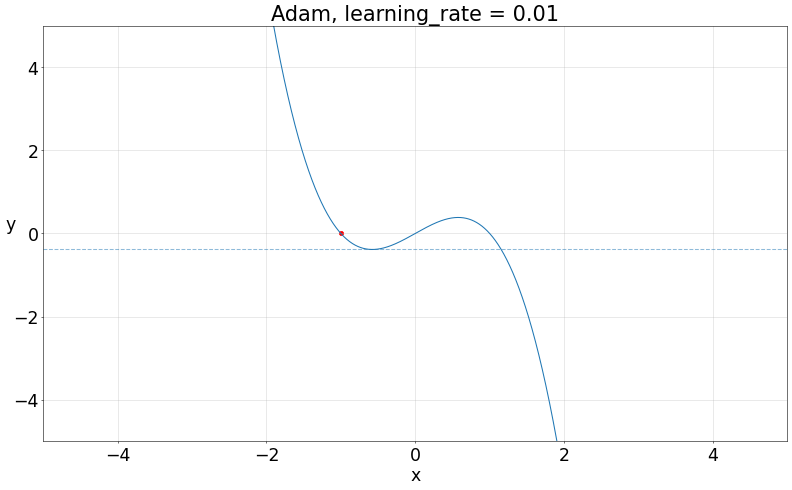

In [6]:
plt.rcParams.update({'font.size': 25})
fig = plt.figure(dpi = 50)

fig.set_figheight(10.80)
fig.set_figwidth(19.20)

x_ = np.linspace(-5, 5, 10000)
y_ = f(x_)

ax = plt.axes()

ax.plot(x_, y_)
ax.grid(alpha = 0.5)
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_xlabel('x')
ax.set_ylabel('y', rotation = 0)
ax.scatter(-1, f(-1), color = 'red')
ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
ax.set_title('Adam, learning_rate = 0.01')

Now we will animate the Adam optimizer.

In [7]:
def animate(i):
    ax.clear()
    ax.plot(x_, y_)
    ax.grid(alpha = 0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation = 0)
    ax.hlines(f(-0.5773502691896256), -5, 5, linestyles = 'dashed', alpha = 0.5)
    ax.set_title('Adam, learning_rate = 0.01')
    
    ax.scatter(point_adam[i], f(point_adam[i]), color = 'red')

The last line in the code snippet above is using the iᵗʰ index value from the list for iᵗʰ frame in the animation.

In [8]:
anim = animation.FuncAnimation(fig, animate, frames = 200, interval = 10)
anim.save('2.7.SGD_Adam.gif')

We are creating an animation that only has 200 frames and the gif is at 50 fps or frame interval is 20 ms.

It is to be noted that in less than 200 iterations we have reached the minima.

## #3 Adam in multi-variable function (2 variables right now)

Everything is the same, we only have to initialize point (1, 0) and moment1 = 0 and moment2 = 0 but with shape (2, 1) and replace fdash(point) with gradient(point).

But first, let us define the function, its partial derivatives and, gradient array

In [9]:
%%latex
\begin{gather*}
    f = 2x^{2} + 2xy + 2y^{2} - 6x \\
        \text{We know that Minima for this function is at (2, -1)} \\
        \text{and we will start from (1, 0)}\\
        \text{The partial derivatives are}\\
        \frac{\partial f}{\partial x} = 4x + 2y - 6 \\
        \frac{\partial f}{\partial y} = 2x + 4y \\
 \end{gather*}

<IPython.core.display.Latex object>

In [10]:
def f(x, y):                                    # function
    return 2*(x**2) + 2*x*y + 2*(y**2) - 6*x    # definition

def fdash_x(x, y):                              # partial derivative
    return 4*x + 2*y - 6                        # w.r.t x

def fdash_y(x, y):                              # partial derivative
    return 2*x + 4*y                            # w.r.t y

def gradient(point):                            # gradients
    return np.array([[     fdash_x(point[0][0], point[1][0])     ],
                     [     fdash_y(point[0][0], point[1][0])     ]], dtype = np.float64)    

Now the steps for Adam in 2 variables are

In [11]:
point = np.array([[   1   ],                     # step 1
                  [   0   ]], dtype = np.float64)
learning_rate = 1

learning_rate = 0.01
beta1 = 0.9                                     # step 2
beta2 = 0.999
epsilon = 10**-8
moment1 = np.array([[   0   ],
                    [   0   ]], dtype = np.float64)
moment2 = np.array([[   0   ],
                    [   0   ]], dtype = np.float64)

for i in range(1000):                           # step 3
    learning_rate_hat = learning_rate * np.sqrt(1 - beta2**(i + 1)) / (1 - beta1**(i + 1))  # step 3.1
    moment1 = beta1 * moment1 + (1 - beta1) * gradient(point)  # step 3.2
    moment2 = beta2 * moment2 + (1 - beta2) * gradient(point)**2  # step 3.3
    update = - learning_rate_hat * moment1 / (moment2**0.5 + epsilon)  # step 3.4
    point += update                             # step 3.5
    
point                                        # Minima

array([[ 2.],
       [-1.]])

I hope now you understand how Adam works.